In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from datetime import *
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import numpy as np

In [ ]:
locations = pd.read_csv("Locations.csv")
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sensor Name  9 non-null      object 
 1   Sensor Type  9 non-null      object 
 2   Latitude     9 non-null      float64
 3   Longitude    9 non-null      float64
 4   Location     9 non-null      object 
dtypes: float64(2), object(3)
memory usage: 488.0+ bytes


In [ ]:
row_data = pd.read_csv("Weather.csv")
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135106 entries, 0 to 135105
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station Name                 135106 non-null  object 
 1   Measurement Timestamp        135106 non-null  object 
 2   Air Temperature              135031 non-null  float64
 3   Wet Bulb Temperature         89147 non-null   float64
 4   Humidity                     135106 non-null  int64  
 5   Rain Intensity               89147 non-null   float64
 6   Interval Rain                135106 non-null  float64
 7   Total Rain                   89147 non-null   float64
 8   Precipitation Type           89147 non-null   float64
 9   Wind Direction               135106 non-null  int64  
 10  Wind Speed                   135106 non-null  float64
 11  Maximum Wind Speed           135106 non-null  float64
 12  Barometric Pressure          134960 non-null  float64
 13 

In [ ]:
locations.rename(columns = {'Sensor Name':'Station Name'}, inplace = True)

row_data = pd.merge(row_data, 
                      locations, 
                      on ='Station Name', 
                      how ='inner')

row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135106 entries, 0 to 135105
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Station Name                 135106 non-null  object 
 1   Measurement Timestamp        135106 non-null  object 
 2   Air Temperature              135031 non-null  float64
 3   Wet Bulb Temperature         89147 non-null   float64
 4   Humidity                     135106 non-null  int64  
 5   Rain Intensity               89147 non-null   float64
 6   Interval Rain                135106 non-null  float64
 7   Total Rain                   89147 non-null   float64
 8   Precipitation Type           89147 non-null   float64
 9   Wind Direction               135106 non-null  int64  
 10  Wind Speed                   135106 non-null  float64
 11  Maximum Wind Speed           135106 non-null  float64
 12  Barometric Pressure          134960 non-null  float64
 13 

In [ ]:
#----- Measurement Timestamp --------------------

temp = row_data["Measurement Timestamp Label"].str.split(" ", n = 1, expand = True)

#spliting the date to day, month and year
temp[0] = pd.to_datetime(temp[0]).dt.strftime('%d/%m/%Y')
row_data[["Measurement Day", "Measurement Month", "Measurement Year"]] = temp[0].str.split("/", expand=True)
row_data["Measurement Hour"] = temp[1]
row_data["Measurement Hour"] = pd.to_datetime(row_data["Measurement Hour"]).dt.strftime('%H:%M:%S')
row_data["Measurement Hour"] = row_data["Measurement Hour"].str.split(":" , expand=True)[0]
row_data["Measurement Date"] = temp[0]

row_data.pop("Measurement Timestamp Label")
row_data.pop("Measurement ID")

#row_data["M_date"] = row_data["Measurement Day"] + "/" + row_data["Measurement Month"] + "/" + row_data["Measurement Year"]

row_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135106 entries, 0 to 135105
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Station Name           135106 non-null  object 
 1   Measurement Timestamp  135106 non-null  object 
 2   Air Temperature        135031 non-null  float64
 3   Wet Bulb Temperature   89147 non-null   float64
 4   Humidity               135106 non-null  int64  
 5   Rain Intensity         89147 non-null   float64
 6   Interval Rain          135106 non-null  float64
 7   Total Rain             89147 non-null   float64
 8   Precipitation Type     89147 non-null   float64
 9   Wind Direction         135106 non-null  int64  
 10  Wind Speed             135106 non-null  float64
 11  Maximum Wind Speed     135106 non-null  float64
 12  Barometric Pressure    134960 non-null  float64
 13  Solar Radiation        135106 non-null  int64  
 14  Heading                89147 non-nul

**Structure Investigation**

# 1.Structure Investigation

In [ ]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135106 entries, 0 to 135105
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Station Name           135106 non-null  object 
 1   Measurement Timestamp  135106 non-null  object 
 2   Air Temperature        135031 non-null  float64
 3   Wet Bulb Temperature   89147 non-null   float64
 4   Humidity               135106 non-null  int64  
 5   Rain Intensity         89147 non-null   float64
 6   Interval Rain          135106 non-null  float64
 7   Total Rain             89147 non-null   float64
 8   Precipitation Type     89147 non-null   float64
 9   Wind Direction         135106 non-null  int64  
 10  Wind Speed             135106 non-null  float64
 11  Maximum Wind Speed     135106 non-null  float64
 12  Barometric Pressure    134960 non-null  float64
 13  Solar Radiation        135106 non-null  int64  
 14  Heading                89147 non-nul

In [ ]:
pd.value_counts(row_data.dtypes)

float64    13
object      9
int64       3
dtype: int64

1.1. Structure of non-numerical features

In [ ]:
row_data.describe(exclude="number")

,Station Name,Measuremen,Measurement Day,Measurement Month,Measurement Year,Measurement Hour
count,132304,132304,132304,132304,132304,132304
unique,3,2162,31,12,8,24
top,63rd Street Weather Station,08/23/2017,28,08,2017,06
freq,46747,72,4523,13428,25154,5581


1.2. Structure of numerical features

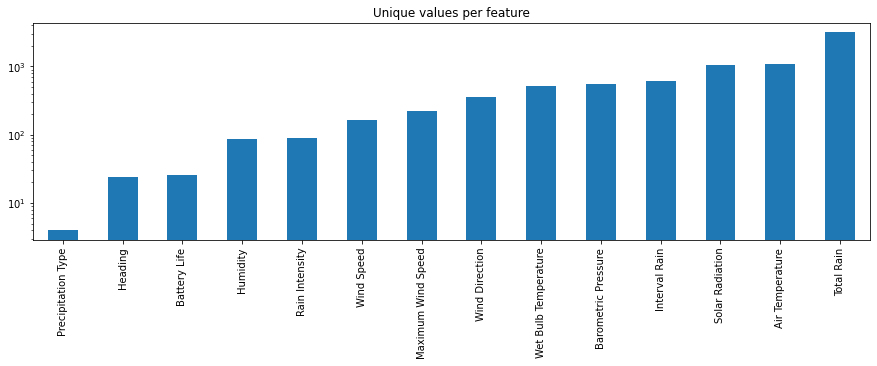

In [ ]:
unique_values = row_data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

# Quality Investigation

Duplicates - we are not expecting any duplicates because the data coming from sensors

Missing Values

Text(0, 0.5, 'Sample Number')

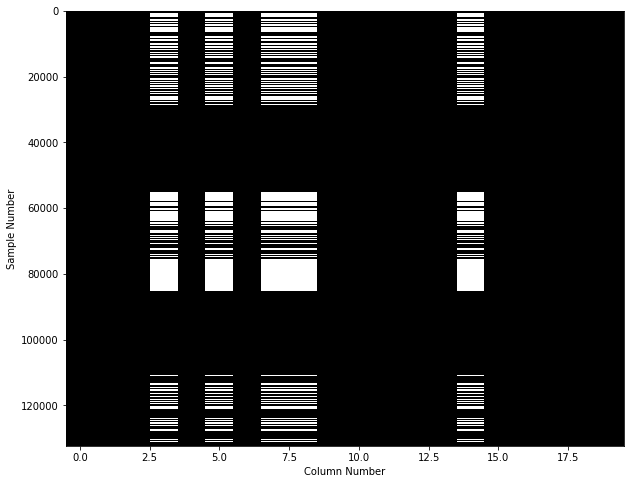

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(row_data.isna(), aspect = "auto", interpolation = "nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

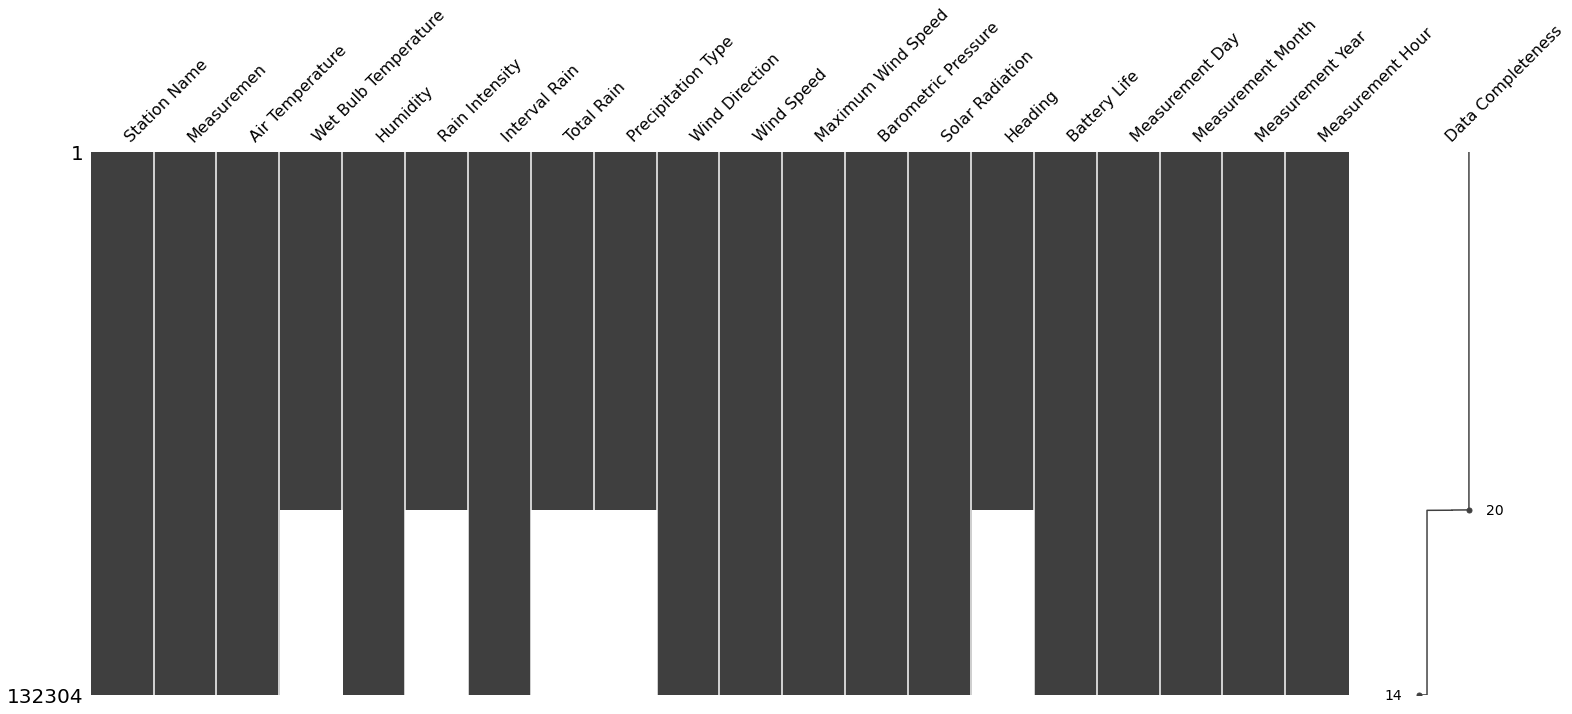

In [ ]:
msno.matrix(row_data, labels = True , sort = "descending")

from both of these plots we can see thaht the dataset has a huge hole in the Transducer depth column. 75% of the the feature values are missing. 
we decied to drop it.

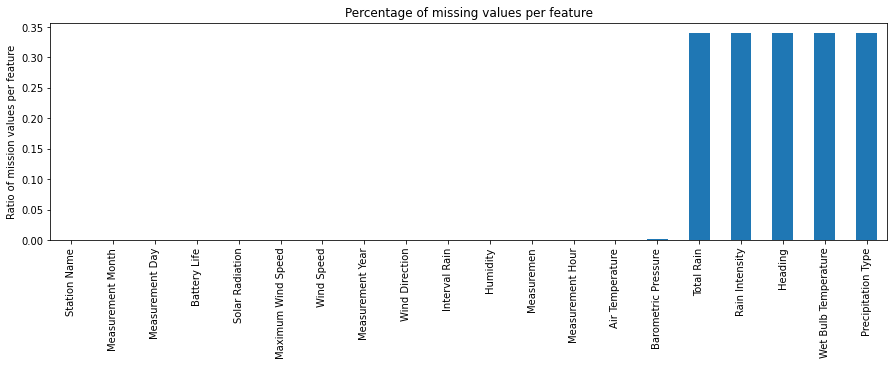

In [ ]:
row_data.isna().mean().sort_values().plot(kind = "bar", figsize=(15,4), 
                                          title = "Percentage of missing values per feature",
                                          ylabel = "Ratio of mission values per feature")


In [ ]:
row_data = row_data.dropna(axis = 0)
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89072 entries, 0 to 135105
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station Name           89072 non-null  object 
 1   Measurement Timestamp  89072 non-null  object 
 2   Air Temperature        89072 non-null  float64
 3   Wet Bulb Temperature   89072 non-null  float64
 4   Humidity               89072 non-null  int64  
 5   Rain Intensity         89072 non-null  float64
 6   Interval Rain          89072 non-null  float64
 7   Total Rain             89072 non-null  float64
 8   Precipitation Type     89072 non-null  float64
 9   Wind Direction         89072 non-null  int64  
 10  Wind Speed             89072 non-null  float64
 11  Maximum Wind Speed     89072 non-null  float64
 12  Barometric Pressure    89072 non-null  float64
 13  Solar Radiation        89072 non-null  int64  
 14  Heading                89072 non-null  float64
 15  B

Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f6545a710>,
      dtype=object)

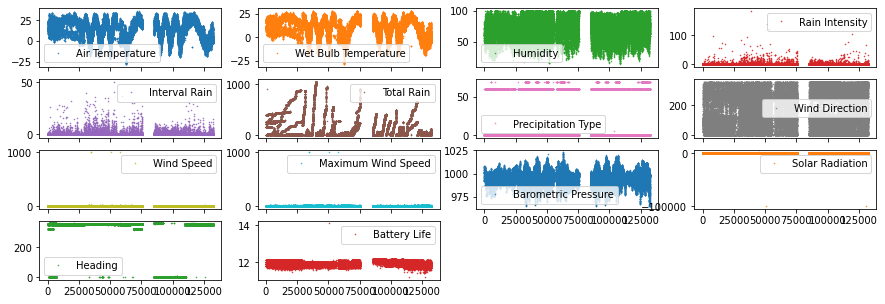

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (15,5), markersize = 1)

In [ ]:
#Q3 = row_data['Water Temperature'].quantile(0.98)
row_data = row_data[~(row_data['Interval Rain'] > 30)]
row_data = row_data[~(row_data['Rain Intensity'] > 30)]
row_data = row_data[~((row_data['Battery Life'] < 9) | (row_data['Battery Life'] > 13))]
row_data = row_data[~(row_data['Maximum Wind Speed'] > 26.4)]
row_data = row_data[~(row_data['Wind Speed'] > 17.7)]
row_data = row_data[~(row_data['Solar Radiation'] < 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc925566050>,
      dtype=object)

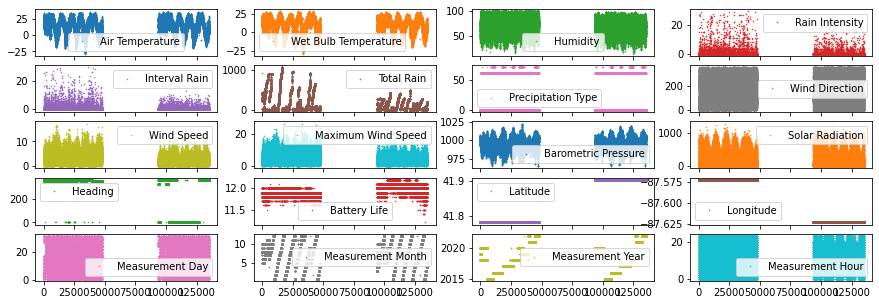

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (15,5), markersize = 1)

In [ ]:
row_data.head(5)

,Station Name,Measuremen,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Day,Measurement Month,Measurement Year,Measurement Hour
0,63rd Street Weather Station,09/27/2018,16.4,12.2,61,0.0,0.0,260.3,0.0,231,2.5,4.7,996.3,484,356.0,11.9,27,09,2018,10
1,63rd Street Weather Station,09/27/2018,17.1,11.5,51,0.0,0.0,260.3,0.0,244,3.6,5.7,995.4,468,356.0,11.9,27,09,2018,11
2,63rd Street Weather Station,09/27/2018,18.2,12.4,51,0.0,0.0,260.3,0.0,248,3.1,5.3,994.8,377,355.0,11.9,27,09,2018,13
4,63rd Street Weather Station,09/27/2018,19.5,13.0,47,0.0,0.0,260.3,0.0,249,3.1,5.7,992.9,461,355.0,11.9,27,09,2018,15
6,63rd Street Weather Station,09/27/2018,20.2,12.2,38,0.0,0.0,260.3,0.0,212,4.1,9.2,992.3,412,355.0,11.9,27,09,2018,16


Non-numerical features outliers - measured by the frequency of the word/category

In [ ]:
ord_enc = OrdinalEncoder()

row_data["Station Name Encoded"] = ord_enc.fit_transform(row_data[["Station Name"]])

#row_data[["Beach Name","Beach Name Encode"]].iloc[13876]

row_data.pop("Station Name")



0         63rd Street Weather Station
1         63rd Street Weather Station
2         63rd Street Weather Station
4         63rd Street Weather Station
6         63rd Street Weather Station
                     ...             
132297     Oak Street Weather Station
132298    63rd Street Weather Station
132300     Oak Street Weather Station
132301    63rd Street Weather Station
132303     Oak Street Weather Station
Name: Station Name, Length: 80037, dtype: object

In [ ]:
row_data["Measurement Day"] = row_data["Measurement Day"].astype("int") 
row_data["Measurement Month"] = row_data["Measurement Month"].astype("int") 
row_data["Measurement Year"] = row_data["Measurement Year"].astype("int") 
row_data["Measurement Hour"] = row_data["Measurement Hour"].astype("int") 
#row_data["Station Name Encoded"] = row_data["Station Name Encoded"].astype("int") 
row_data.pop("Station Name")
row_data.pop("Measurement Timestamp")
#row_data.pop("Measurement Date")
row_data.pop("Sensor Type")
row_data.pop("Location")



row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81828 entries, 0 to 135105
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Temperature       81828 non-null  float64
 1   Wet Bulb Temperature  81828 non-null  float64
 2   Humidity              81828 non-null  int64  
 3   Rain Intensity        81828 non-null  float64
 4   Interval Rain         81828 non-null  float64
 5   Total Rain            81828 non-null  float64
 6   Precipitation Type    81828 non-null  float64
 7   Wind Direction        81828 non-null  int64  
 8   Wind Speed            81828 non-null  float64
 9   Maximum Wind Speed    81828 non-null  float64
 10  Barometric Pressure   81828 non-null  float64
 11  Solar Radiation       81828 non-null  int64  
 12  Heading               81828 non-null  float64
 13  Battery Life          81828 non-null  float64
 14  Latitude              81828 non-null  float64
 15  Longitude         

In [ ]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80037 entries, 0 to 132303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Measuremen            80037 non-null  object 
 1   Air Temperature       80037 non-null  float64
 2   Wet Bulb Temperature  80037 non-null  float64
 3   Humidity              80037 non-null  int64  
 4   Total Rain            80037 non-null  float64
 5   Wind Direction        80037 non-null  int64  
 6   Wind Speed            80037 non-null  float64
 7   Maximum Wind Speed    80037 non-null  float64
 8   Barometric Pressure   80037 non-null  float64
 9   Solar Radiation       80037 non-null  int64  
 10  Heading               80037 non-null  float64
 11  Battery Life          80037 non-null  float64
 12  Measurement Day       80037 non-null  int64  
 13  Measurement Month     80037 non-null  int64  
 14  Measurement Year      80037 non-null  int64  
 15  Measurement Hour  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8092f2050>,
      dtype=object)

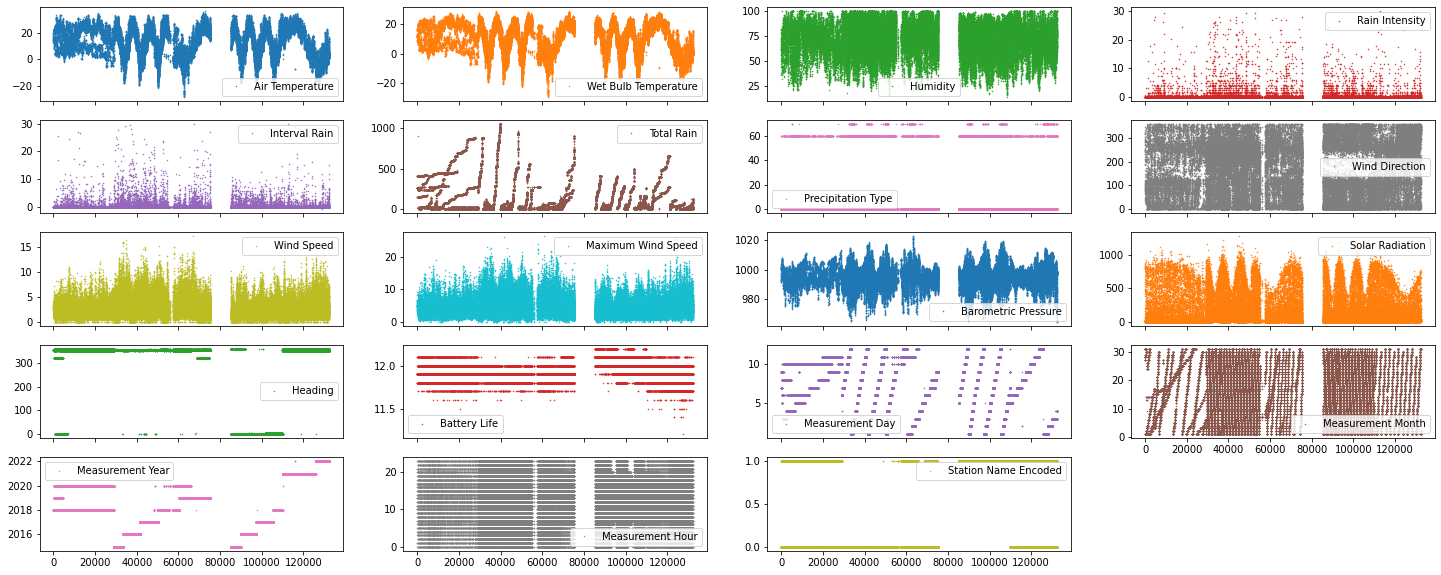

In [ ]:
row_data.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (25,10), markersize = 1)

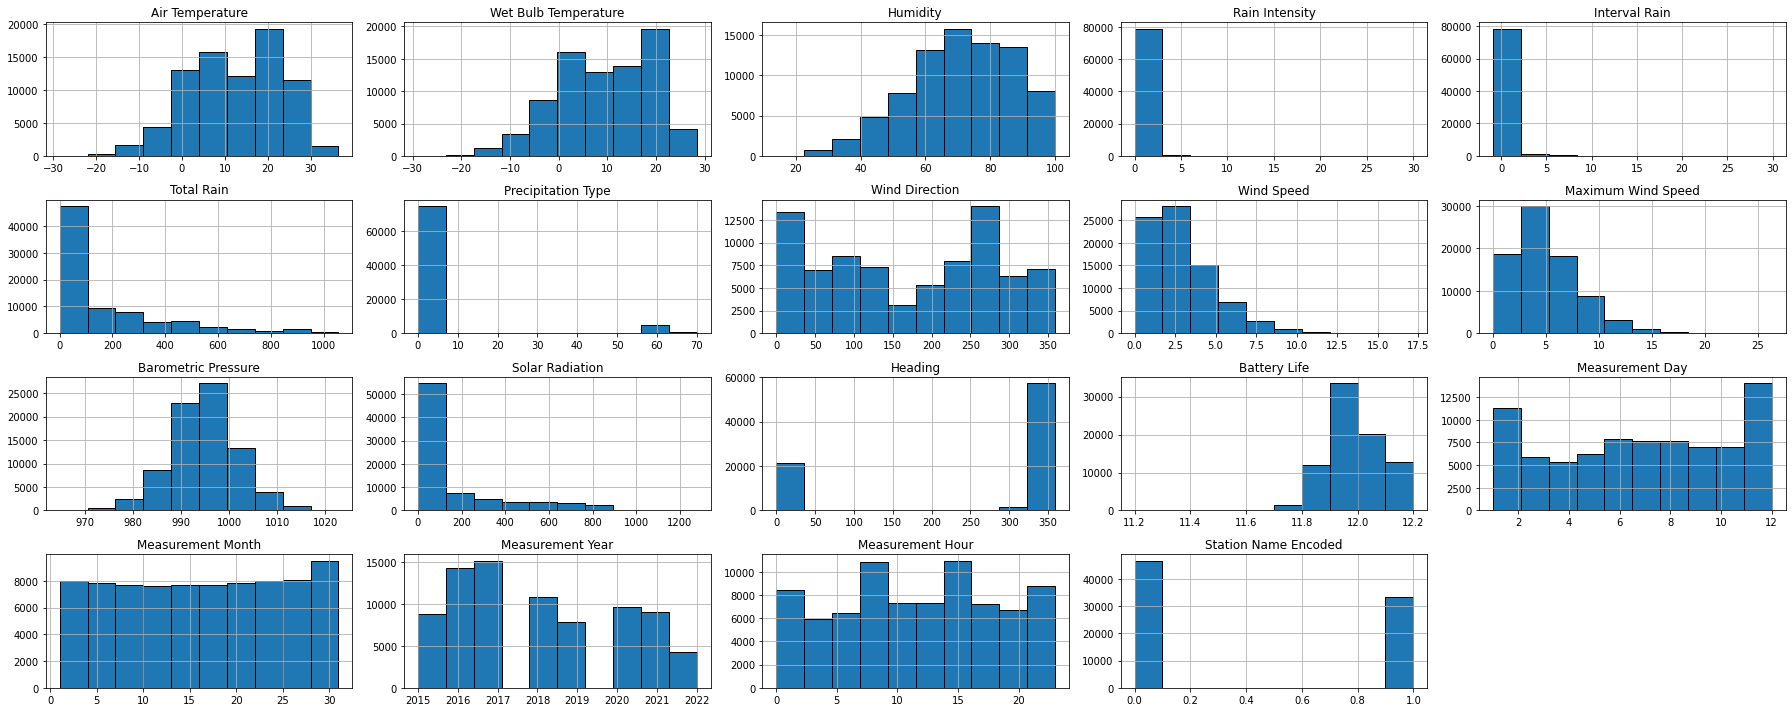

In [ ]:
row_data.hist(bins = 10, figsize = (25,10), layout=(-1,5), edgecolor = "black")
plt.tight_layout();

Rain Intensity          0.964229
Precipitation Type      0.929982
Interval Rain           0.920724
Station Name Encoded    0.582993
Battery Life            0.418344
Measurement Year        0.189987
Heading                 0.175756
Solar Radiation         0.115721
Measurement Day         0.098255
Measurement Hour        0.045791
Measurement Month       0.034347
Wind Speed              0.026788
Humidity                0.022640
Wind Direction          0.020541
Maximum Wind Speed      0.016555
Total Rain              0.012844
Barometric Pressure     0.007109
Air Temperature         0.005885
Wet Bulb Temperature    0.005098
dtype: float64

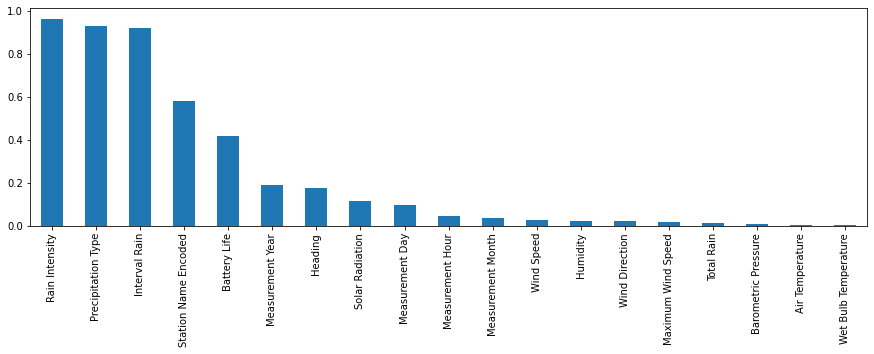

In [ ]:
most_frequent_entery = row_data.mode().iloc[0]

most_frequent_entery
df_freq = row_data.eq(most_frequent_entery.values , axis = 1)
df_freq = df_freq.mean().sort_values(ascending = False)

display(df_freq)

df_freq.plot.bar(figsize = (15,4))

In [ ]:
row_data.pop("Rain Intensity")
row_data.pop("Precipitation Type")
row_data.pop("Interval Rain")

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
135101    0.0
135102    0.0
135103    0.0
135104    0.0
135105    0.0
Name: Interval Rain, Length: 81828, dtype: float64

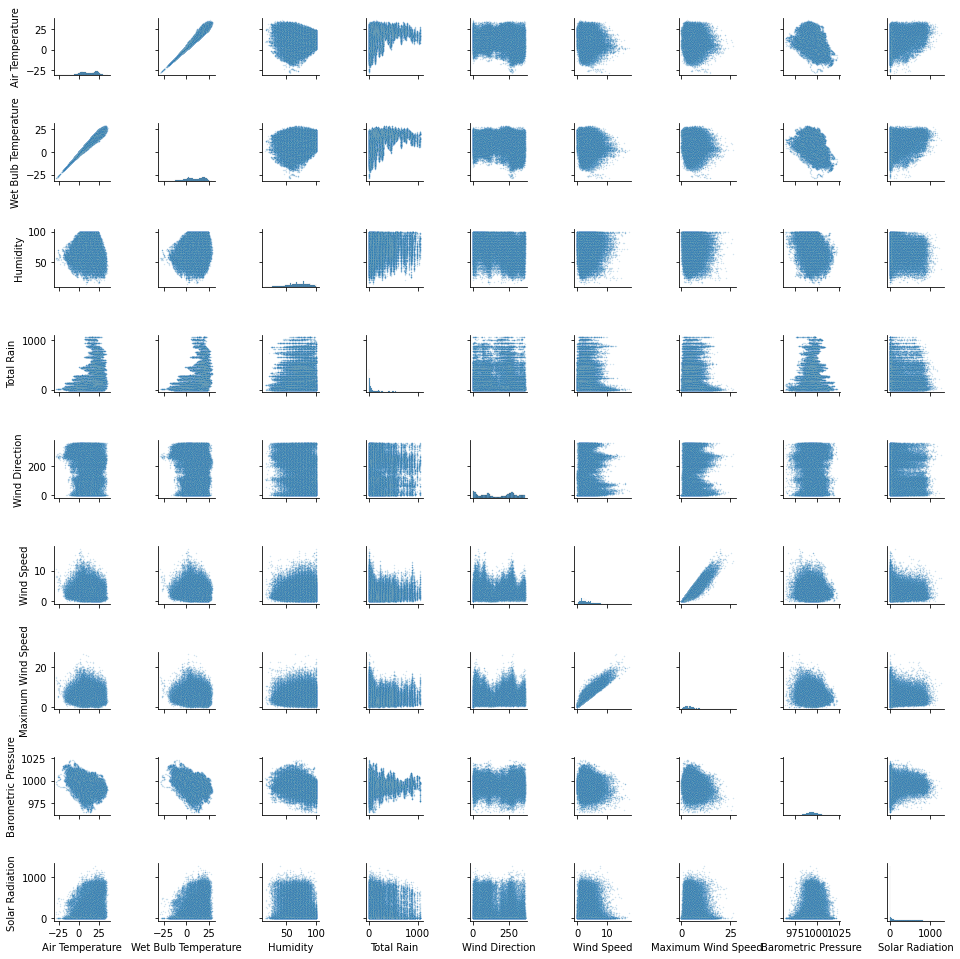

In [ ]:
cols_continous = row_data.select_dtypes(include = "number").nunique() >= 40
df_continous = row_data[cols_continous[cols_continous].index]

sns.pairplot(df_continous , height = 1.5 , plot_kws = {"s":2,"alpha":0.2})

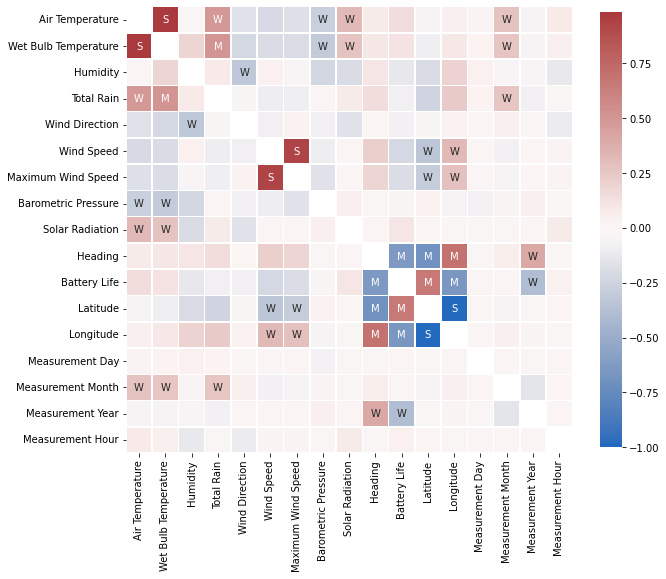

In [ ]:
df_corr = row_data.corr(method = "pearson")

labels = np.where(np.abs(df_corr) > 0.75 , "S", np.where(np.abs(df_corr) > 0.5 , "M", np.where(np.abs(df_corr) > 0.25 , "W", " ")))

plt.figure(figsize = (10,10))
sns.heatmap(df_corr, mask = np.eye(len(df_corr)), square=True , center = 0, annot=labels, fmt='', linewidths=0.5,
            cmap = "vlag", cbar_kws={"shrink":0.8})

In [ ]:
row_data.pop("Air Temperature")
row_data.pop("Maximum Wind Speed")

0         4.7
1         5.7
2         5.3
4         5.7
6         9.2
         ... 
132297    0.9
132298    3.7
132300    1.5
132301    4.1
132303    3.3
Name: Maximum Wind Speed, Length: 80037, dtype: float64

In [ ]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80037 entries, 0 to 132303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wet Bulb Temperature  80037 non-null  float64
 1   Humidity              80037 non-null  int64  
 2   Total Rain            80037 non-null  float64
 3   Wind Direction        80037 non-null  int64  
 4   Wind Speed            80037 non-null  float64
 5   Barometric Pressure   80037 non-null  float64
 6   Solar Radiation       80037 non-null  int64  
 7   Heading               80037 non-null  float64
 8   Battery Life          80037 non-null  float64
 9   Measurement Day       80037 non-null  int64  
 10  Measurement Month     80037 non-null  int64  
 11  Measurement Year      80037 non-null  int64  
 12  Measurement Hour      80037 non-null  int64  
 13  Station Name Encoded  80037 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 11.2 MB


In [ ]:
row_data.to_csv('Weather_ML.csv')